# Multiple Linear Regression with OneHot Encoding

### Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# This will suppress all warnings
import warnings
warnings.filterwarnings('ignore')  

### Load the Data

In [6]:
data=pd.read_csv('data/homeprice_1.csv')
data.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,61000
3,monroe township,3600,680000
4,monroe township,4000,725000


### Data Preprocessing

In [8]:
data.columns

Index(['town', 'area', 'price'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    13 non-null     object
 1   area    13 non-null     int64 
 2   price   13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 444.0+ bytes


In [10]:
data.describe()

,area,price
count,13.000000,13.000000
mean,3146.153846,587000.000000
std,453.900475,168120.492505
min,2600.000000,61000.000000
25%,2800.000000,575000.000000
50%,3100.000000,615000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [11]:
data.dtypes

town     object
area      int64
price     int64
dtype: object

In [12]:
data.shape

(13, 3)

In [13]:
data.size

39

In [14]:
data.isna().sum()

town     0
area     0
price    0
dtype: int64

In [15]:
data.duplicated().sum()

0

### Correlation Analysis

In [17]:
correlation_matrix = data[['area', 'price']].corr()
correlation_matrix

,area,price
area,1.000000,0.287097
price,0.287097,1.000000


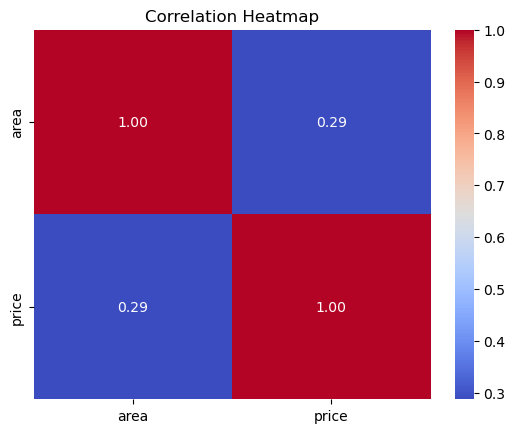

In [18]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Data Visualization

Text(0, 0.5, 'price')

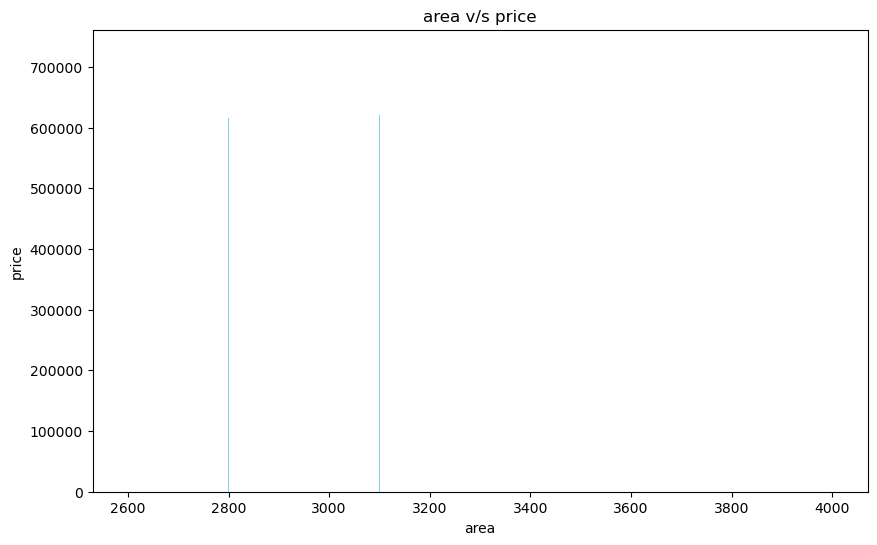

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(data['area'], data['price'], color='skyblue')
plt.title('area v/s price')
plt.xlabel('area')
plt.ylabel('price')

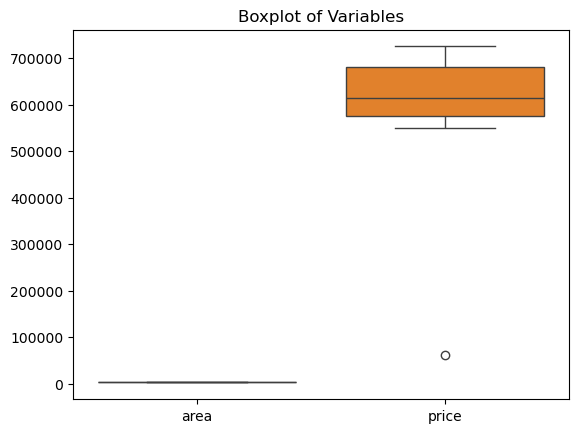

In [21]:
sns.boxplot(data=data)
plt.title("Boxplot of Variables")
plt.show()

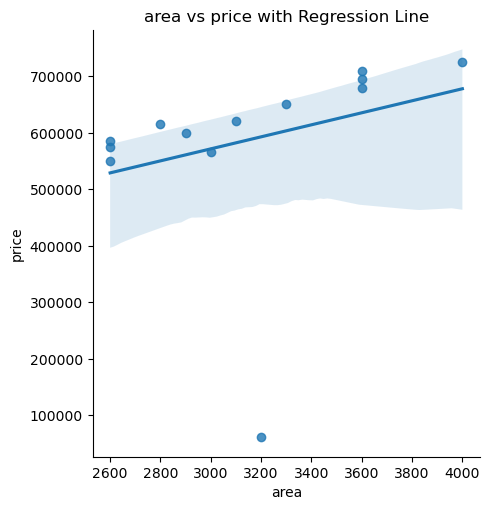

In [22]:
sns.lmplot(x='area', y='price', data=data)
plt.title('area vs price with Regression Line')
plt.show()

### Encoding

The function get_dummies() in pandas is used to convert categorical variables into numeric values, specifically through a technique known as One-Hot Encoding.

One-Hot Encoding:

One-Hot Encoding is a method where each category in a categorical feature is represented as a binary (0 or 1) vector. For each category in a column, a new column is created. A "1" indicates that the observation belongs to that category, and a "0" indicates it does not.

In [25]:
dum=pd.get_dummies(data['town'],dtype=int)
dum

# data1=pd.get_dummies(data, columns=['town'], drop_first=True)
# data1

,monroe township,robbinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [26]:
# merge old dataframe and dummies
data1=pd.concat([data,dum],axis=1)
data1.head()

,town,area,price,monroe township,robbinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,61000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0


In [27]:
# remove town column
data1=data1.drop('town',axis=1)
data1.head()

,area,price,monroe township,robbinsville,west windsor
0,2600,550000,1,0,0
1,3000,565000,1,0,0
2,3200,61000,1,0,0
3,3600,680000,1,0,0
4,4000,725000,1,0,0


### Spliting the Data into Multiple Inputs(X) & One Target(Y) variables

In [29]:
X = data1.drop('price', axis=1)  # Independent variables
y = data1['price']  # Dependent variable

### Spliting data into test data & train data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Linear Regression Modeling

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predictions

In [36]:
y_pred = model.predict(X_test)
y_pred

array([602590.90909092, 647681.81818184, 692772.72727277])

### Model Coefficients and Intercept

In [38]:
print("Coefficient:",model.coef_) #m
print("Intercept:",model.intercept_) #C

Coefficient: [   112.72727273 -29439.39393939   7378.78787879  22060.60606061]
Intercept: 271303.0303029073


### Visualization of Actual & Predicted Values

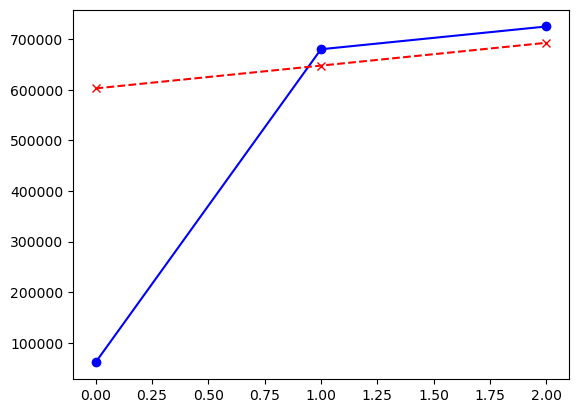

In [40]:
# Plotting actual values (y_test) with a line (blue)
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual Values', linestyle='-', marker='o')

# Plotting predicted values (y_pred) with a line (red)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted Values', linestyle='--', marker='x')


### Performance Metrics for Regression Models: MAE, MSE, and RMSE

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

202045.45454543558
98467924931.1309
313795.9925351675


### Creating DataFrame to view Results

In [44]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Actual vs Predicted Results:\n", results_df)

Actual vs Predicted Results:
    Actual      Predicted
2   61000  602590.909091
3  680000  647681.818182
4  725000  692772.727273


### r2 value calculations

In [46]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

-0.07278856624424446

### Conclusion

In [48]:
print("\nConclusion:")
if r2 > 0.9:
    print(f"The model performs excellently with an R-squared value of {r2:.4f}. It explains over 90% of the variance in the target variable.")
else:
    print(f"The model's performance is moderate with an R-squared value of {r2:.4f}. Consider improving the model by adding more features or using more advanced techniques.")



Conclusion:
The model's performance is moderate with an R-squared value of -0.0728. Consider improving the model by adding more features or using more advanced techniques.


In [49]:
#END

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
print(f"Training Data R² Score: {train_score}")
test_score = model.score(X_test, y_test)
print(f"Testing Data R² Score: {test_score}")

Training Data R² Score: 0.9593125005441834
Testing Data R² Score: -0.07278856624424446
